In [2]:
import os.path
import numpy as np
import pandas as pd
import time
from datetime import datetime

import shtReader_py.shtRipper as shtRipper
from source.Files_operating import read_dataFile
from source.NN_environment import process_fragments, get_borders, normalise_series, down_to_zero
from source.NN_environment import get_prediction_unet

shtRipper v1.3


In [17]:
df =  pd.read_csv("data/intervals/df/44350_data.csv", sep=",")
df.describe()

t            ch1     ch1_marked  ch1_ai_marked
count  393216.000000  393216.000000  393216.000000   3.932160e+05
mean        0.196607       0.178219       0.005211   1.605117e-02
std         0.113512       0.273904       0.071998   1.170007e-01
min         0.000000      -0.472888       0.000000   0.000000e+00
25%         0.098304       0.012781       0.000000   9.135473e-32
50%         0.196607       0.046011       0.000000   4.436533e-20
75%         0.294911       0.334856       0.000000   3.254418e-12
max         0.393215       4.820903       1.000000   1.000000e+00

In [15]:
interval_path = "data/intervals/"
signal_path = "data/d-alpha/"
sht_path = "data/sht/"

filename = "sht44350"
F_ID = filename[-5:]

if os.path.isfile(signal_path + f"df/{F_ID}_data.csv"):
    df = pd.read_csv(signal_path + f"df/{F_ID}_data.csv", sep=",")
elif os.path.isfile(interval_path + f"df/{F_ID}_data.csv"):
    df = pd.read_csv(interval_path + f"df/{F_ID}_data.csv", sep=",")
else:
    df = read_dataFile(interval_path + filename + "_exportGlobus2.dat", F_ID)
    df["ch1_marked"] = pd.Series([0] * df.shape[0])
    df["ch1_ai_marked"] = pd.Series([0] * df.shape[0])

df.describe()

t            ch1     ch1_marked  ch1_ai_marked
count  393216.000000  393216.000000  393216.000000   3.932160e+05
mean        0.196607       0.178219       0.011147   1.605117e-02
std         0.113512       0.273904       0.104987   1.170007e-01
min         0.000000      -0.472888       0.000000   0.000000e+00
25%         0.098304       0.012781       0.000000   9.135473e-32
50%         0.196607       0.046011       0.000000   4.436533e-20
75%         0.294911       0.334856       0.000000   3.254418e-12
max         0.393215       4.820903       1.000000   1.000000e+00

Input visualising mode [ 0 - manual | 1 - only marked ]: 1
Input marking mode (0 - manual | 1 - semiauto):  1
Input start index [0:393000]:  0


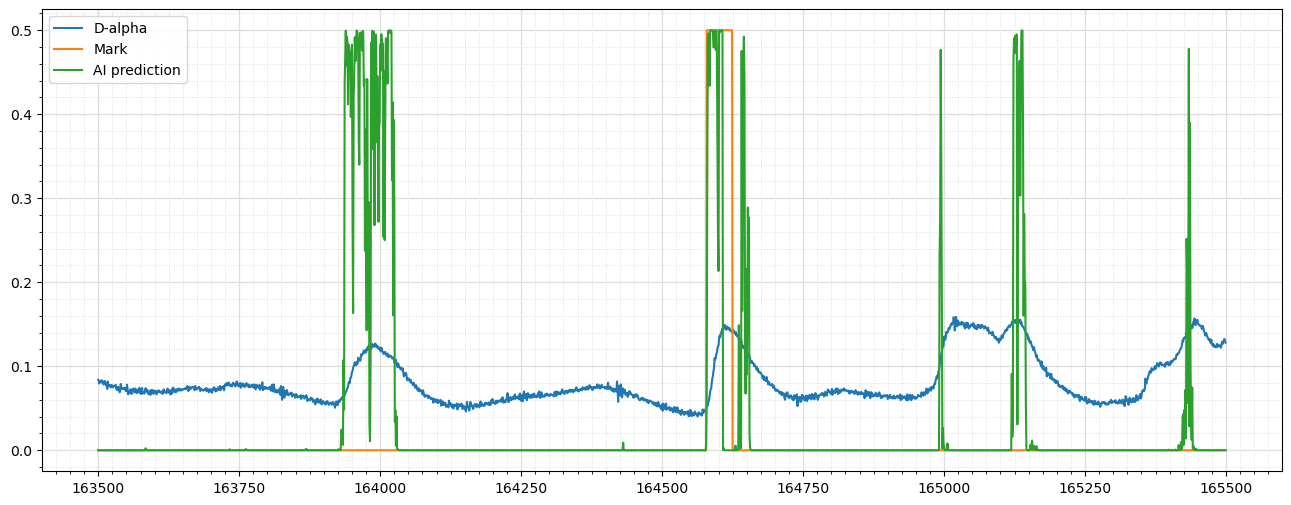

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

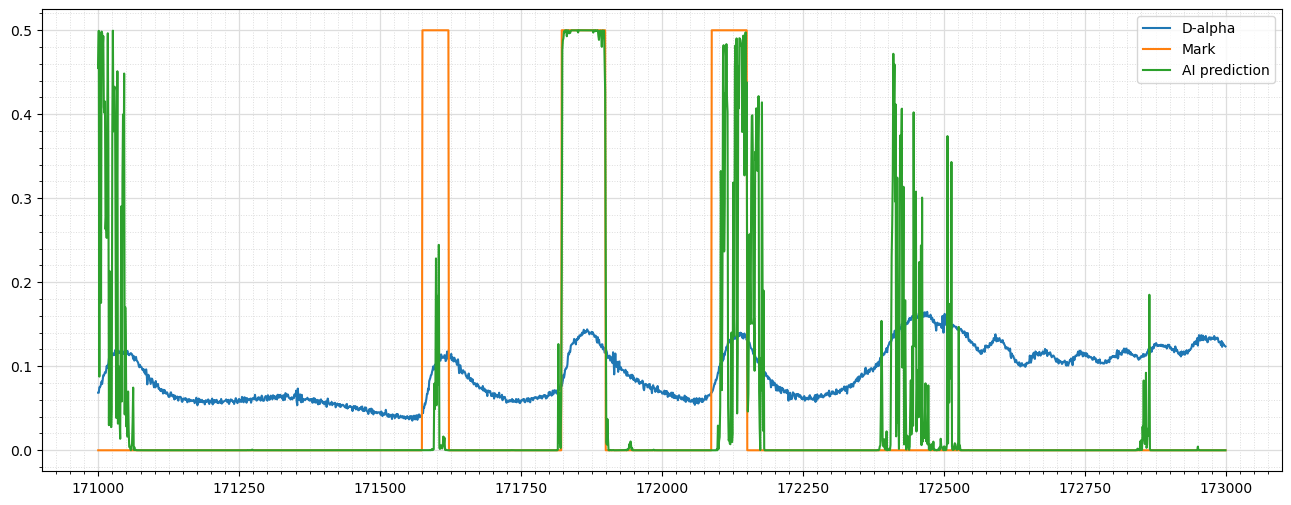

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

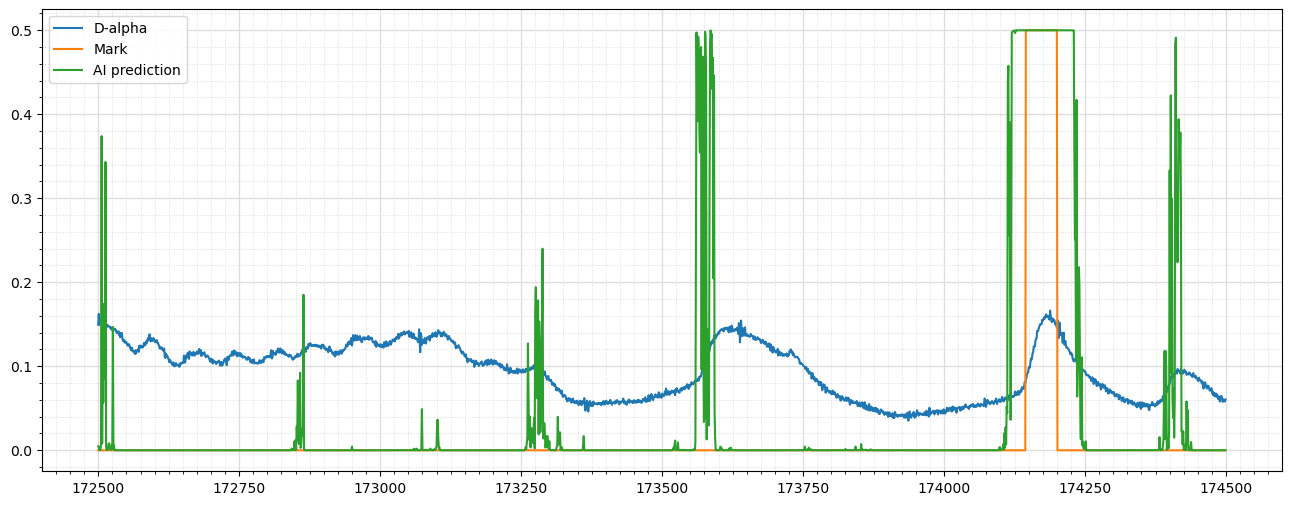

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

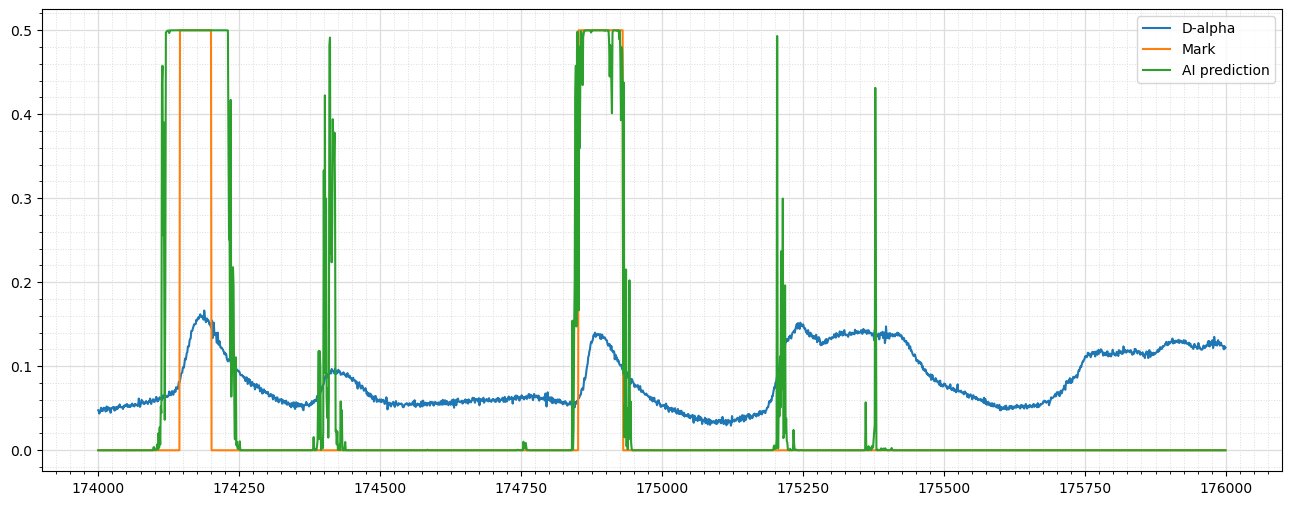

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

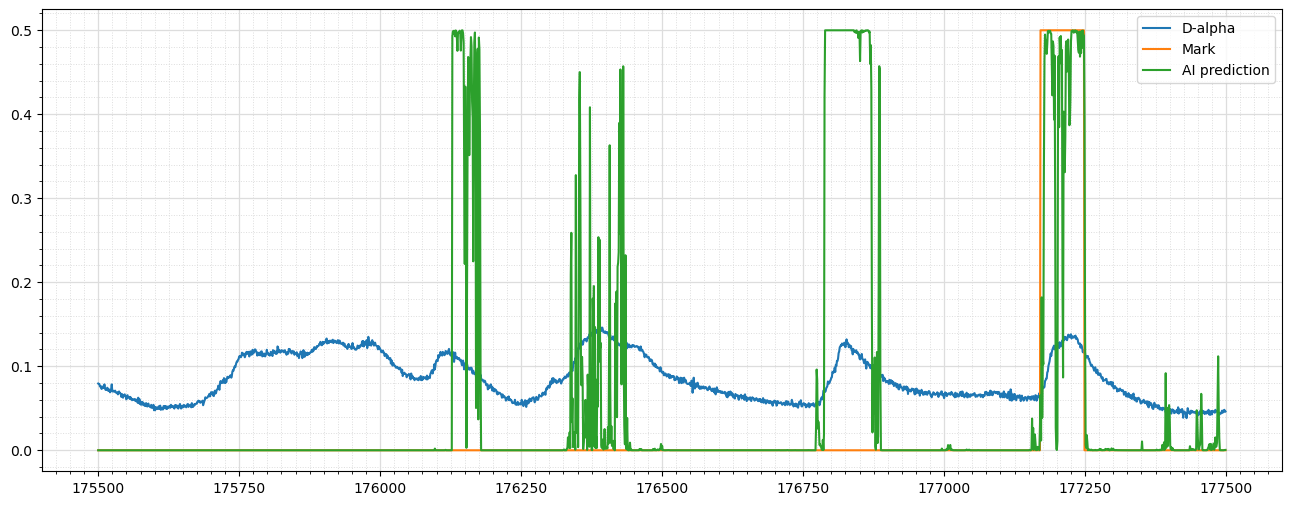

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

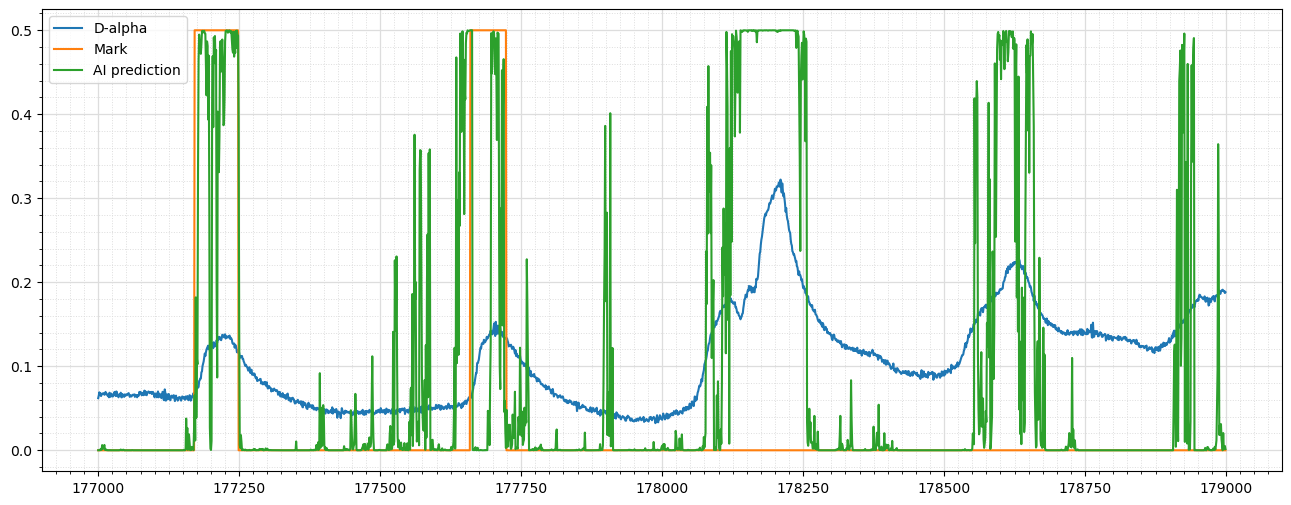

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

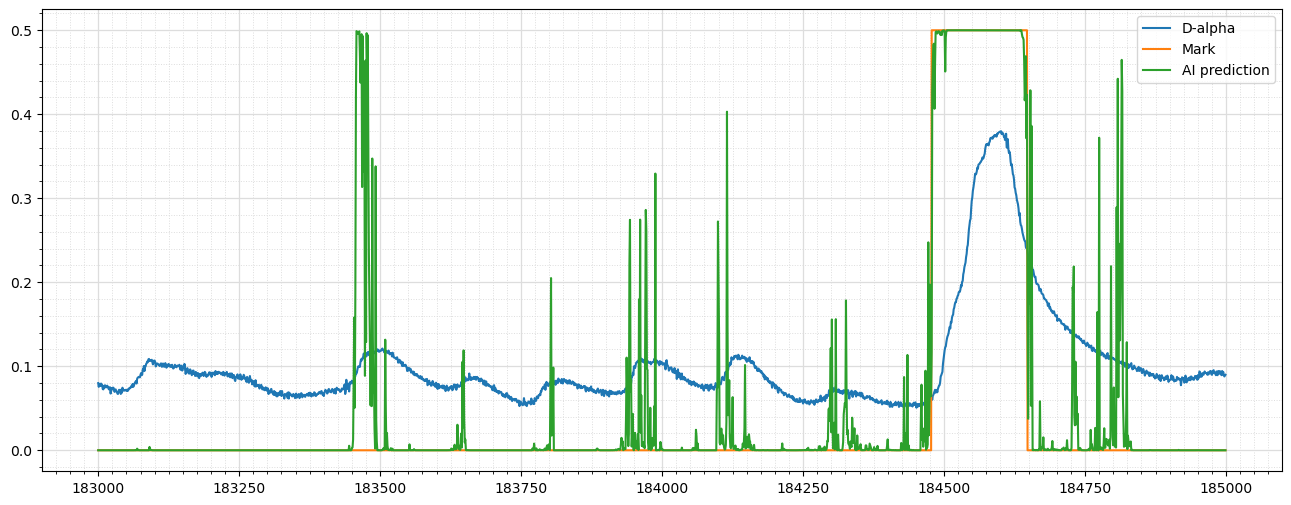

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

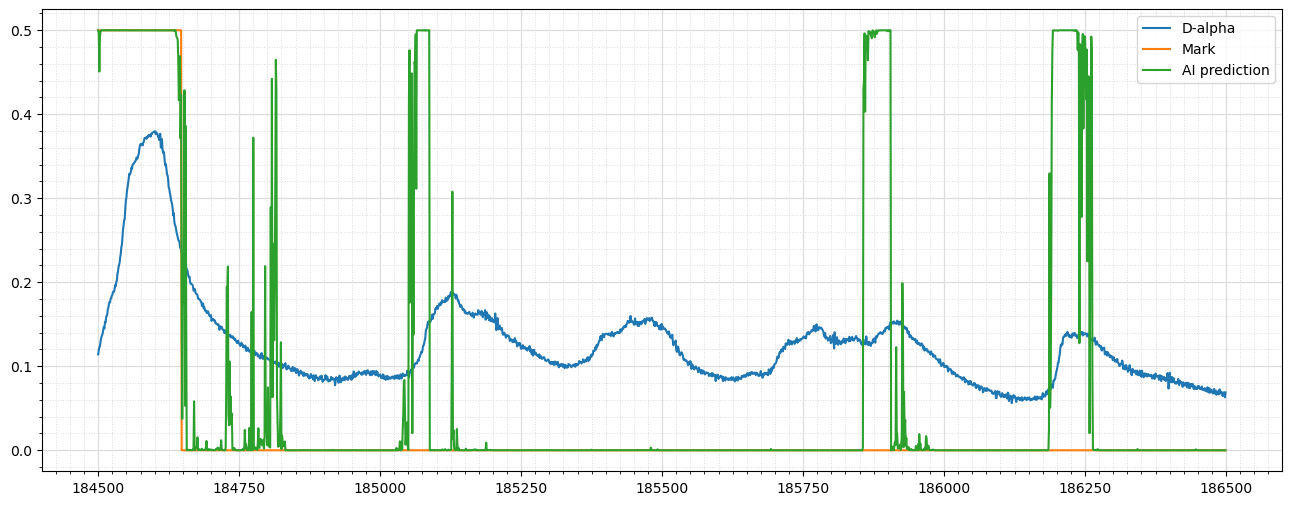

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

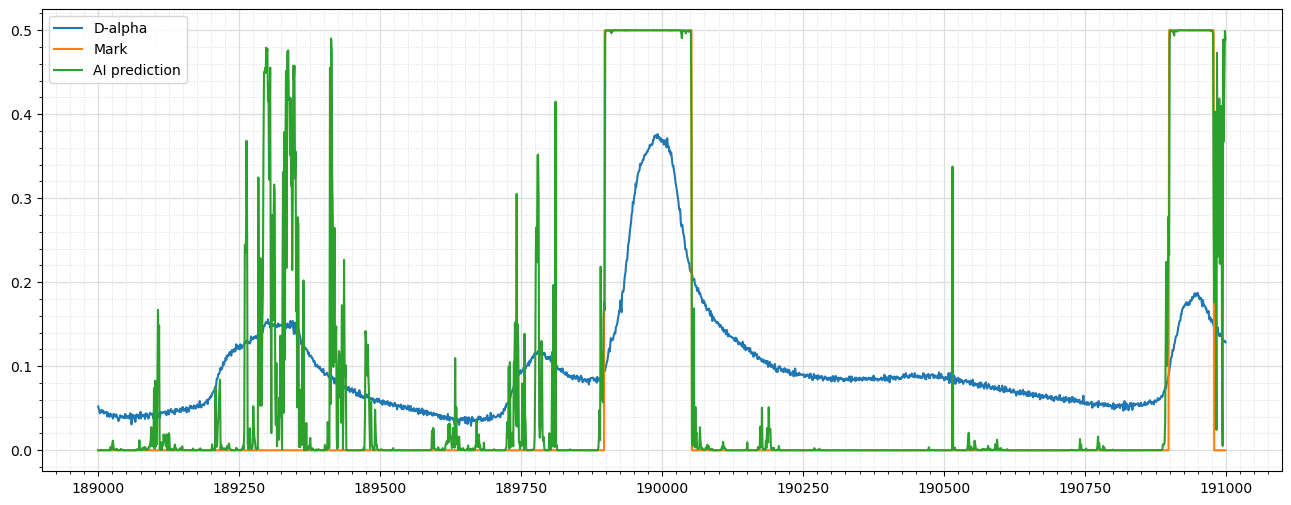

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

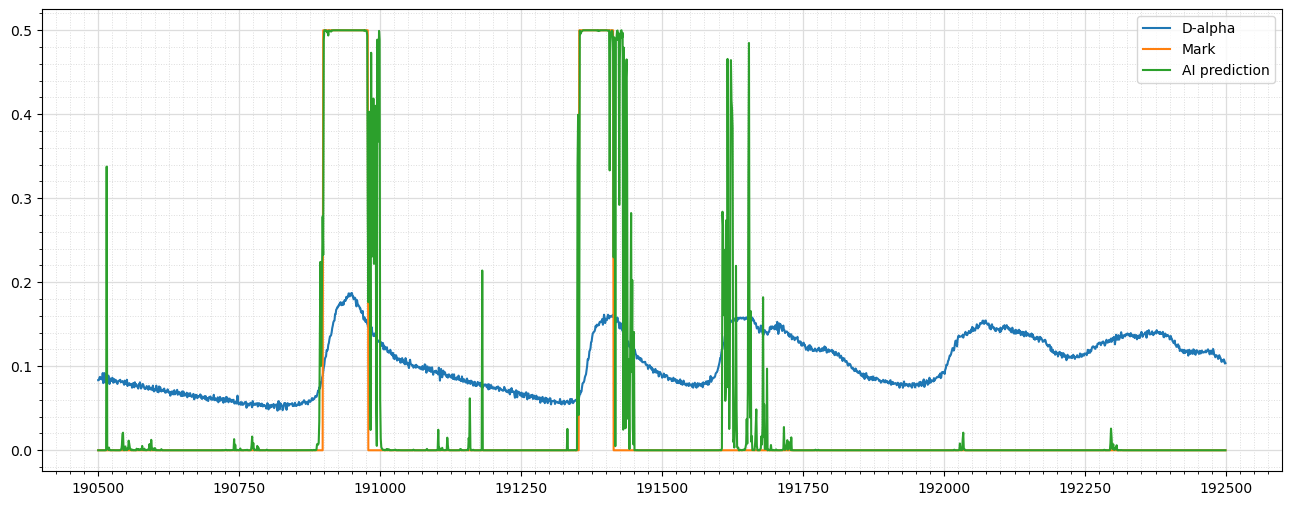

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

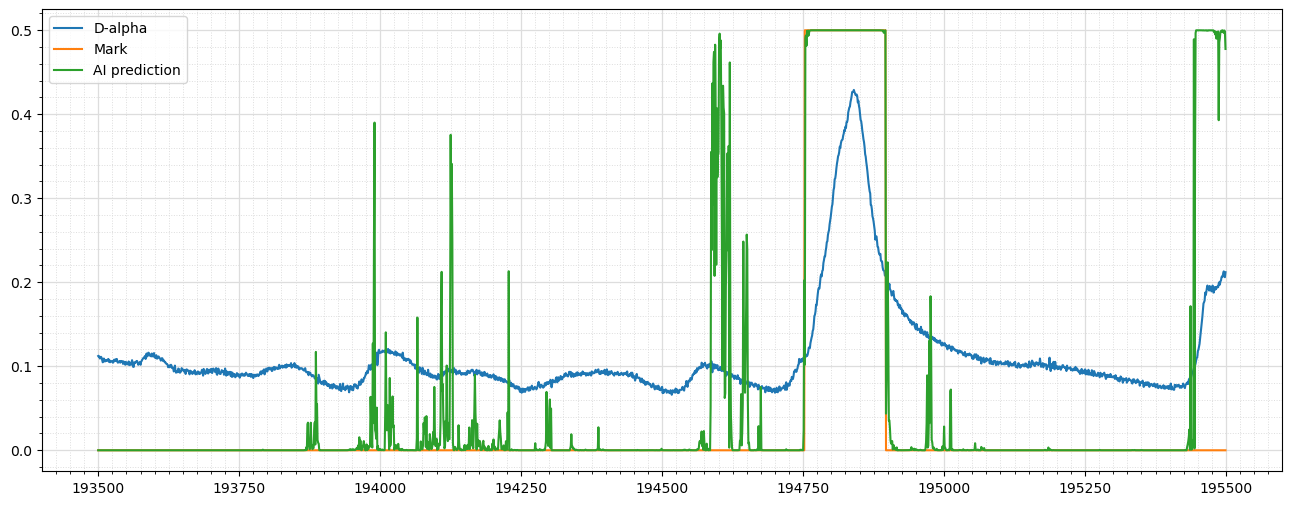

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

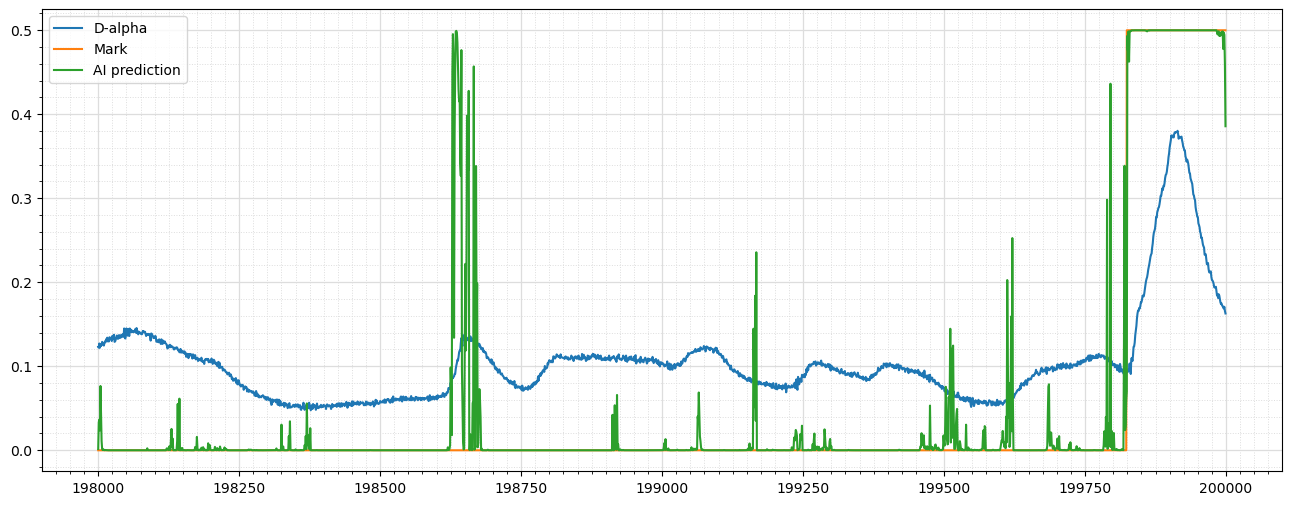

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

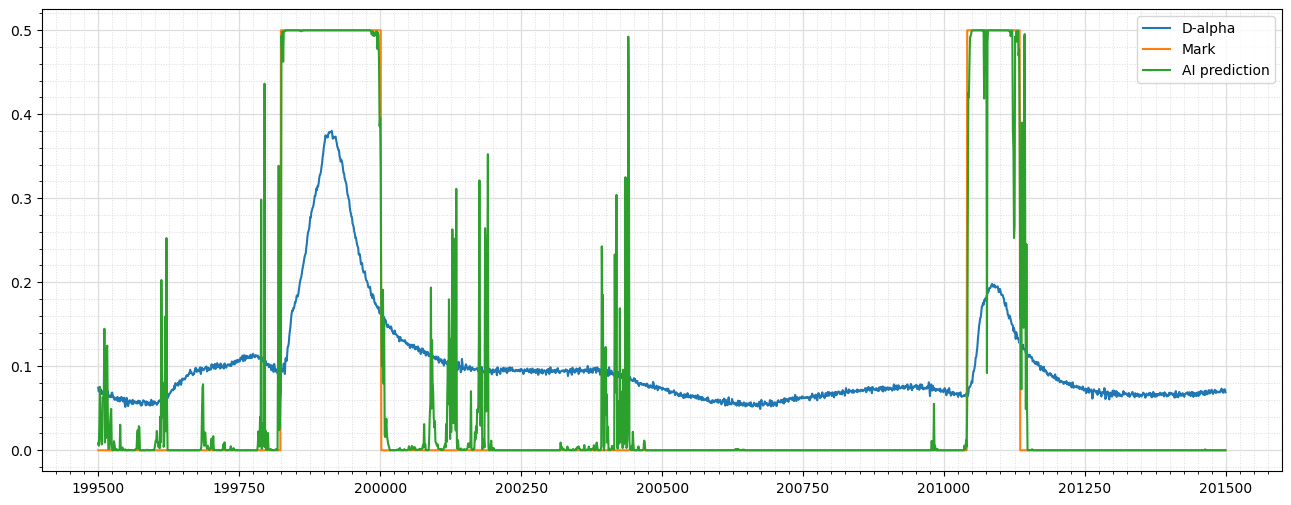

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

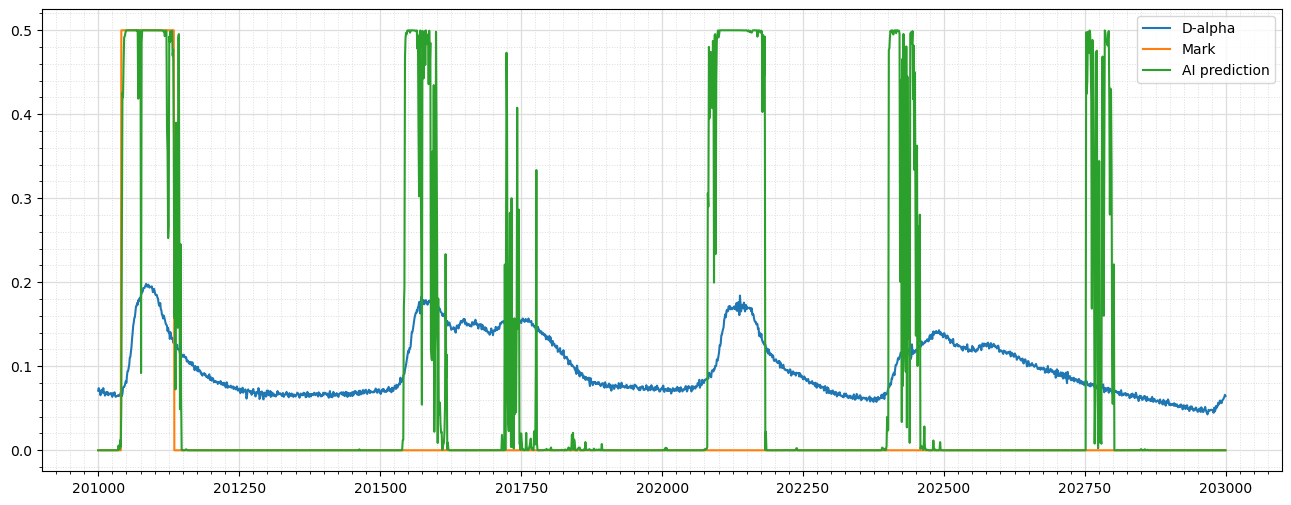

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

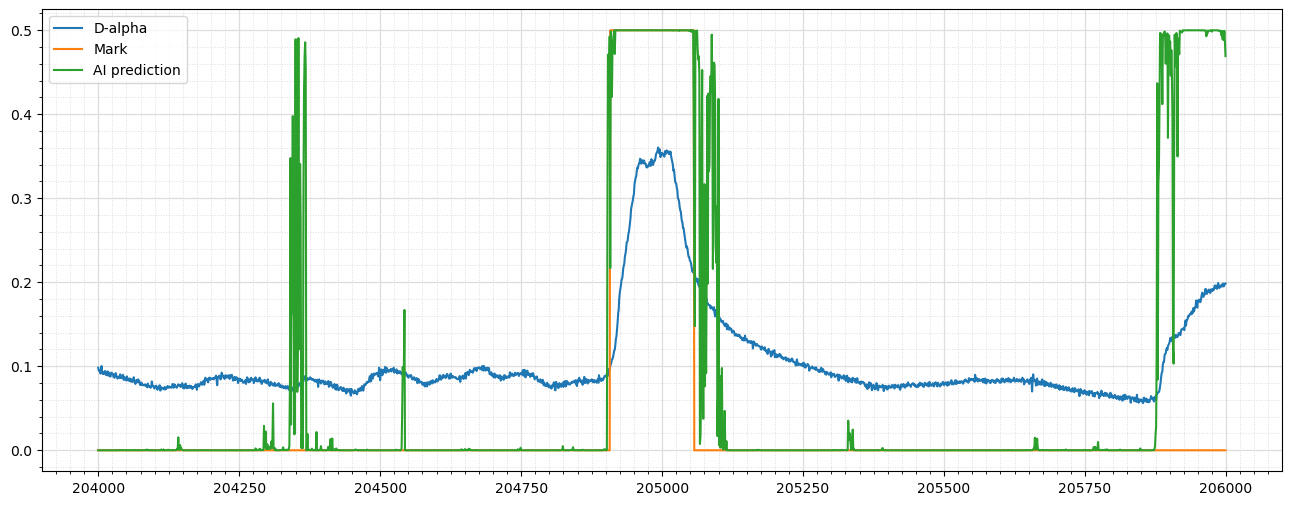

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

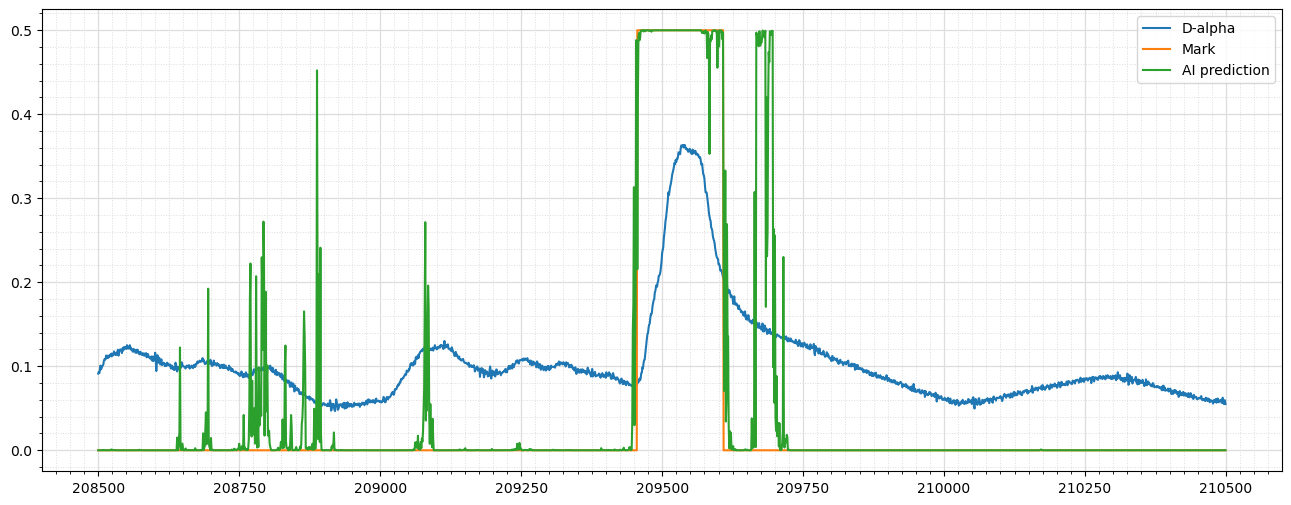

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

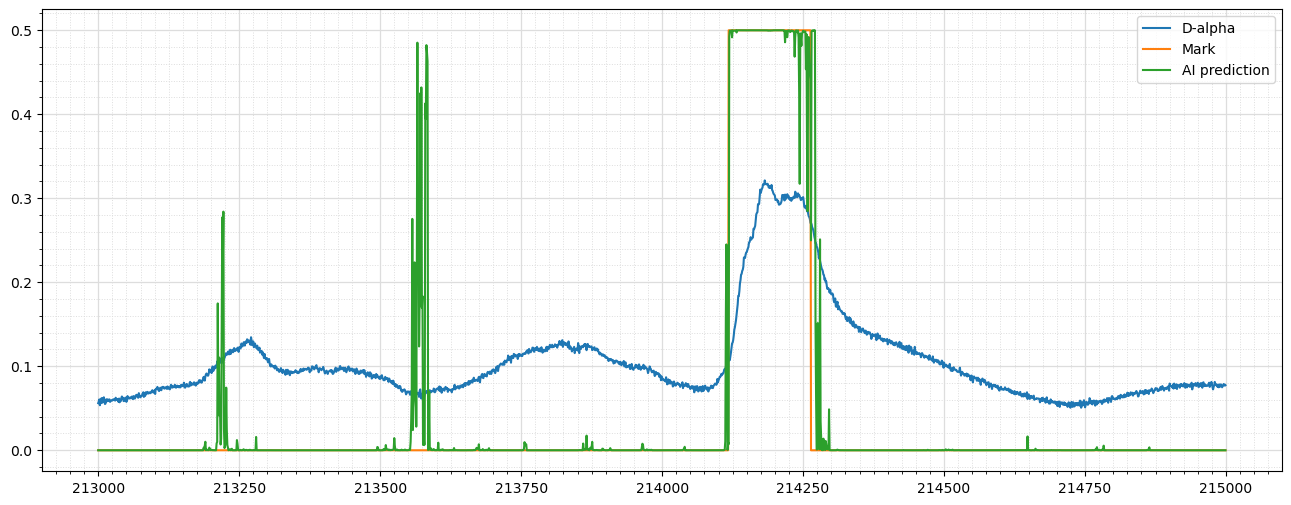

Input index pairs of ELM fragments:
 214000 214300 214000 214200
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

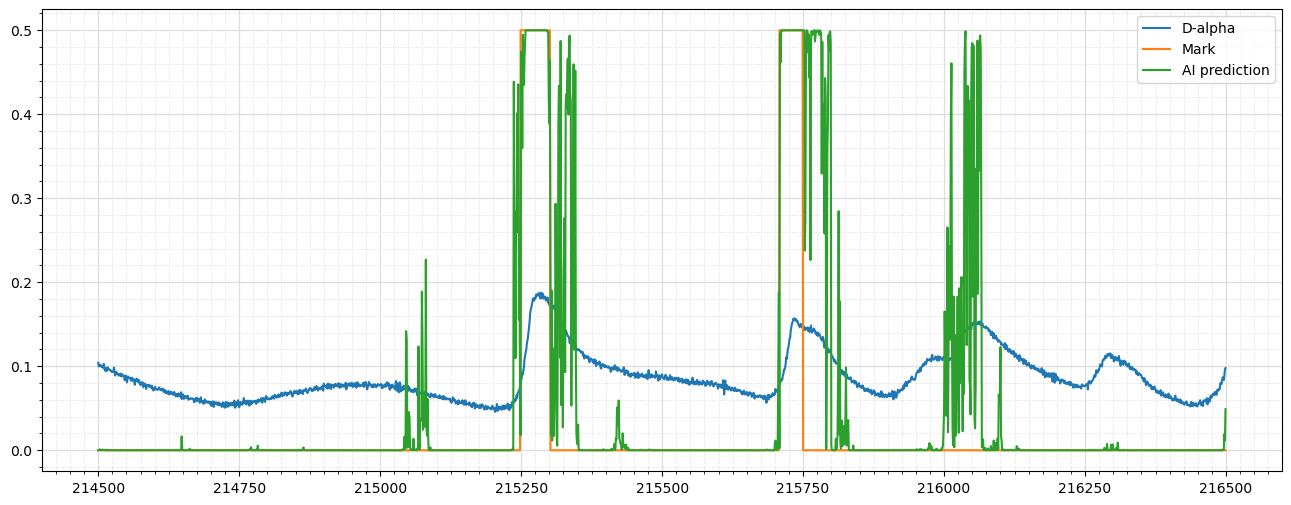

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

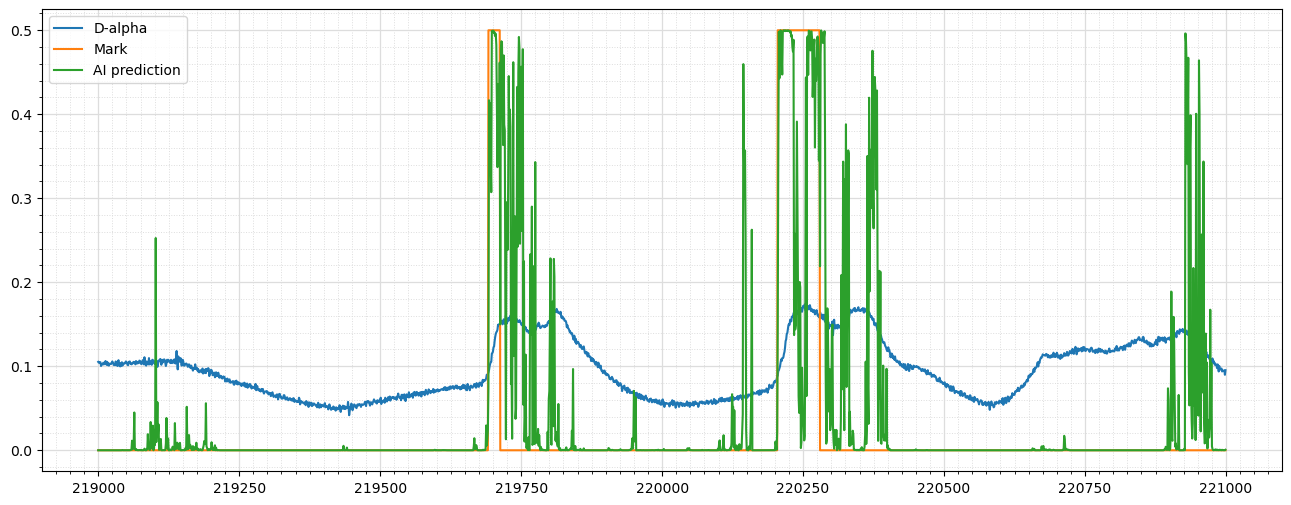

Input index pairs of ELM fragments:
 219500 220500
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

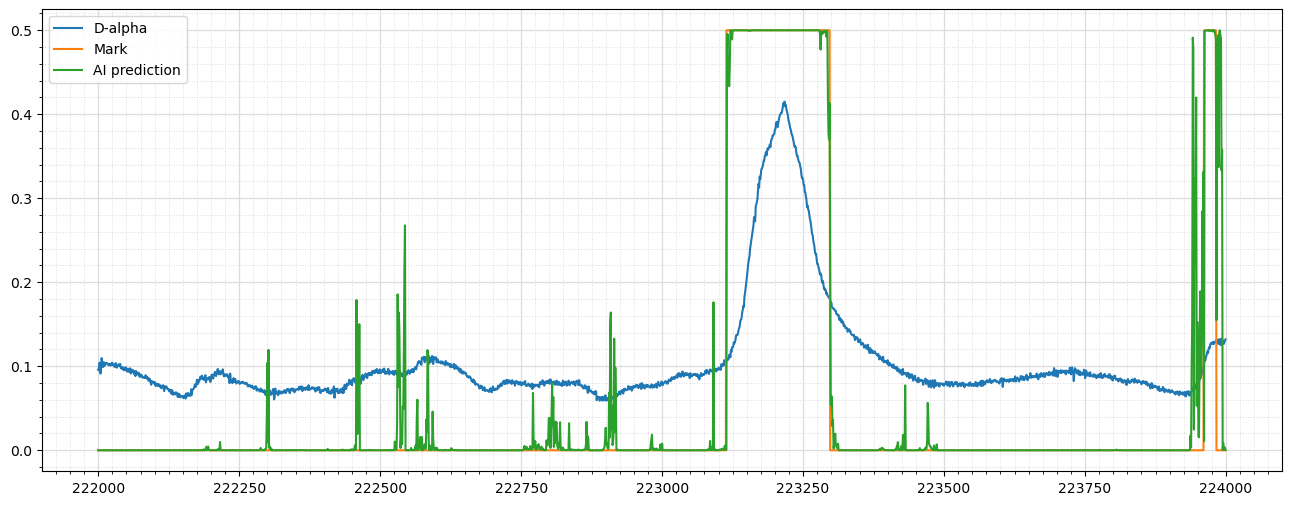

Input index pairs of ELM fragments:
 


<Figure size 640x480 with 0 Axes>

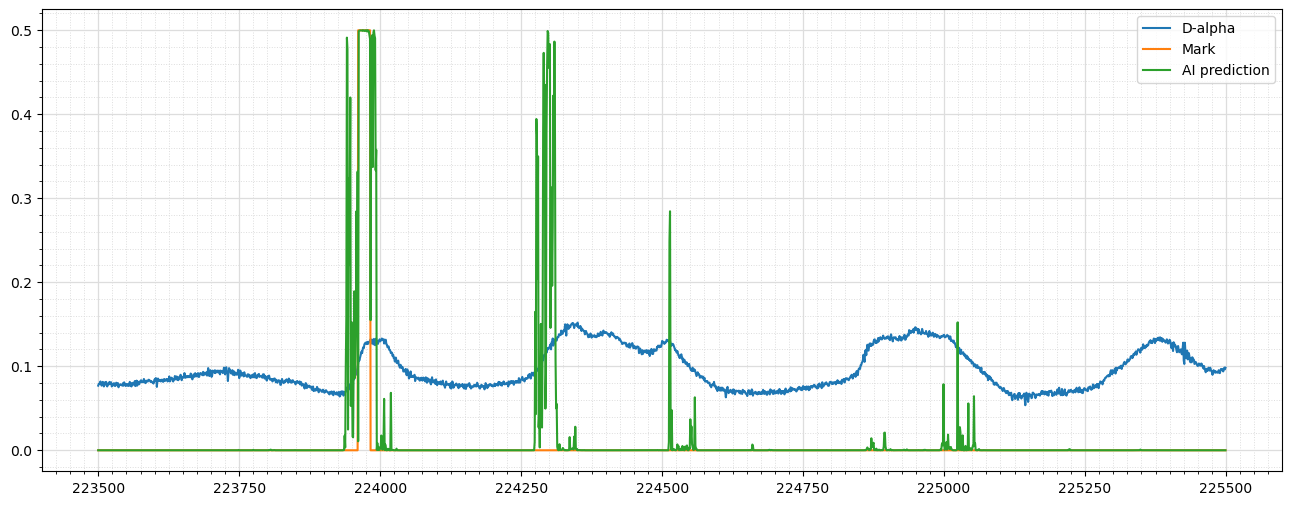

Input index pairs of ELM fragments:
 223500 224000
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

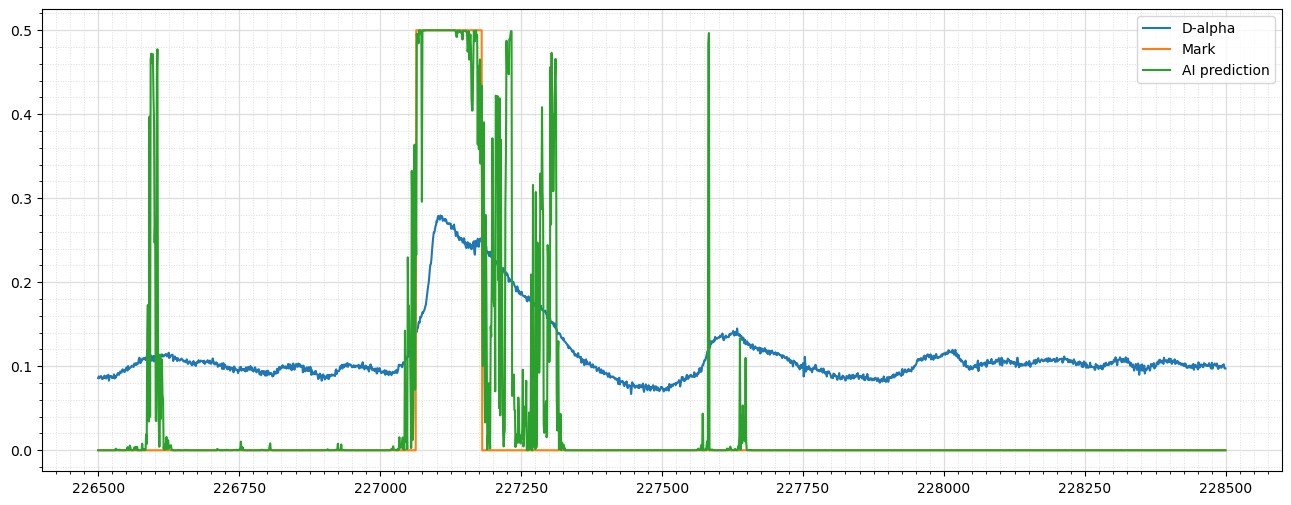

Input index pairs of ELM fragments:
 227000 227500
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

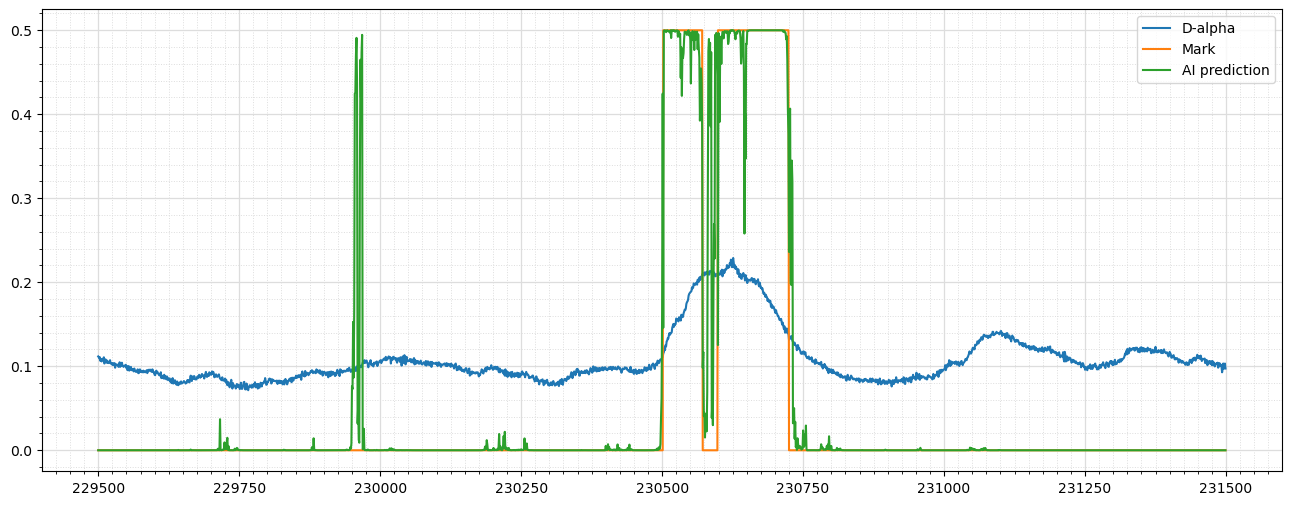

Input index pairs of ELM fragments:
 230000 231000
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

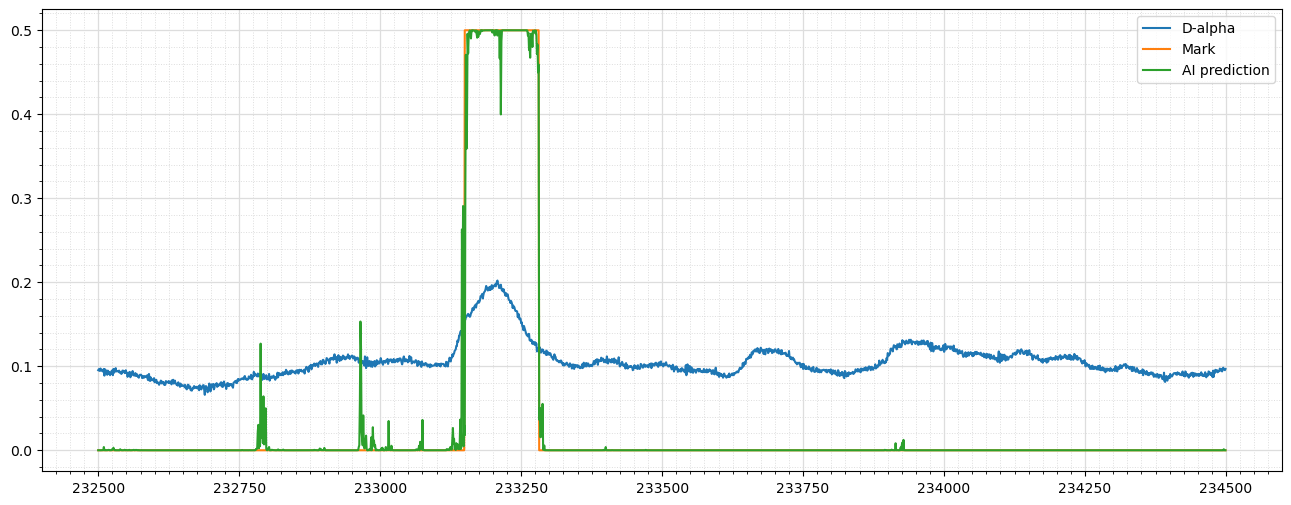

Input index pairs of ELM fragments:
 233000 23500


<Figure size 640x480 with 0 Axes>

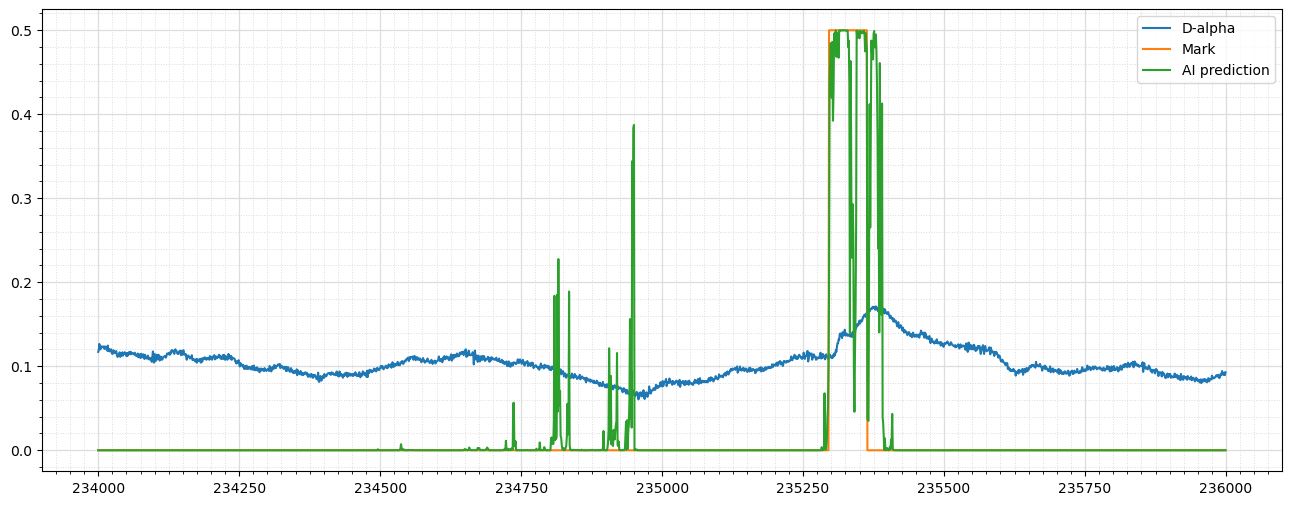

Input index pairs of ELM fragments:
 233000 235500
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

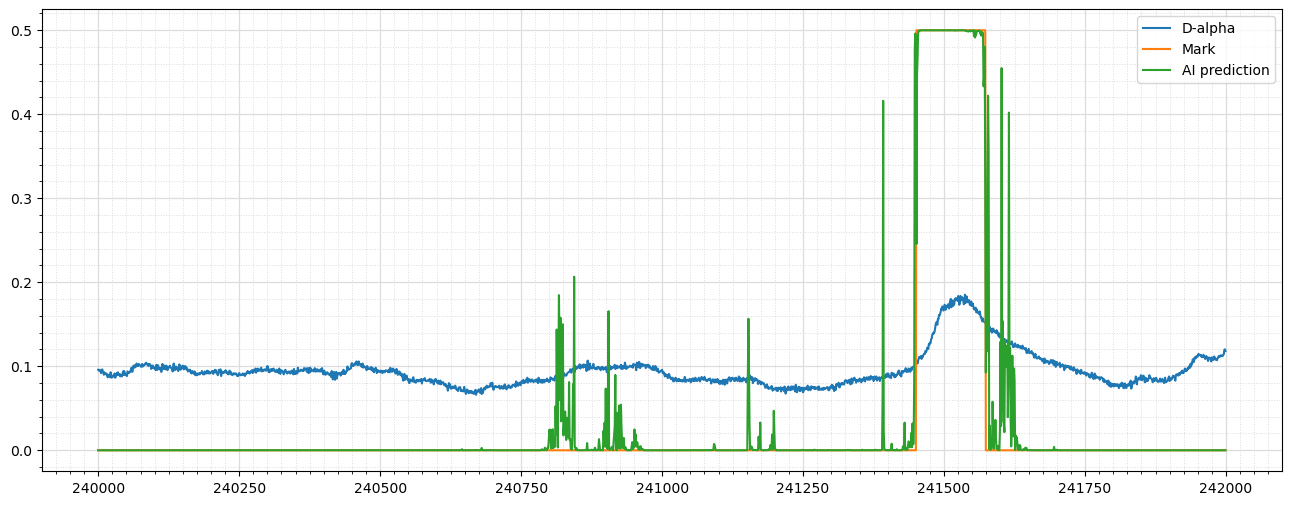

Input index pairs of ELM fragments:
 241000 242000
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

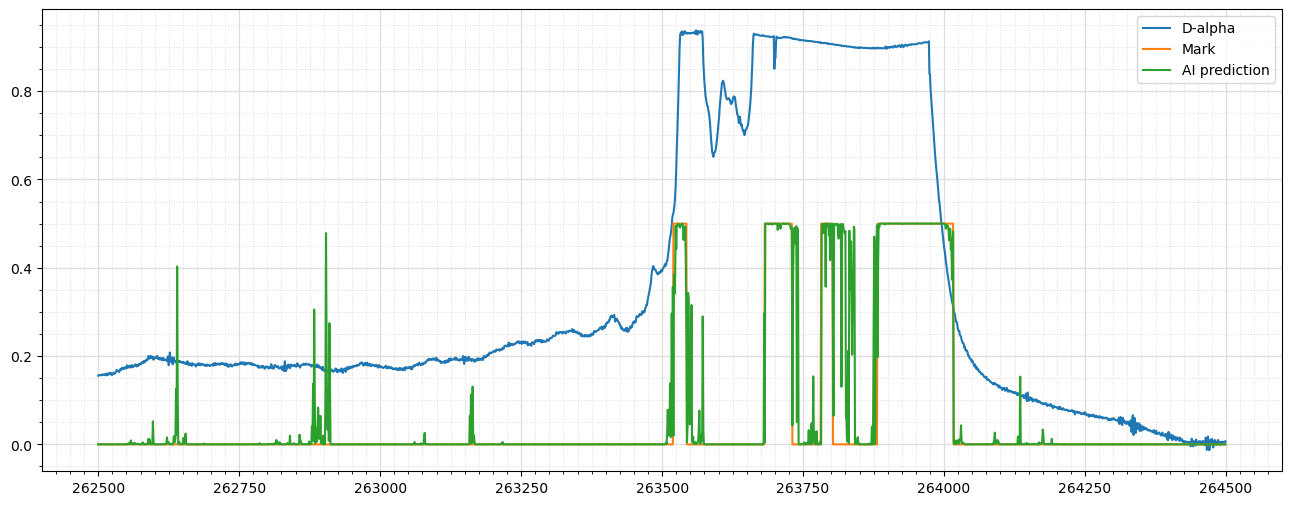

Input index pairs of ELM fragments:
 263000 264500
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

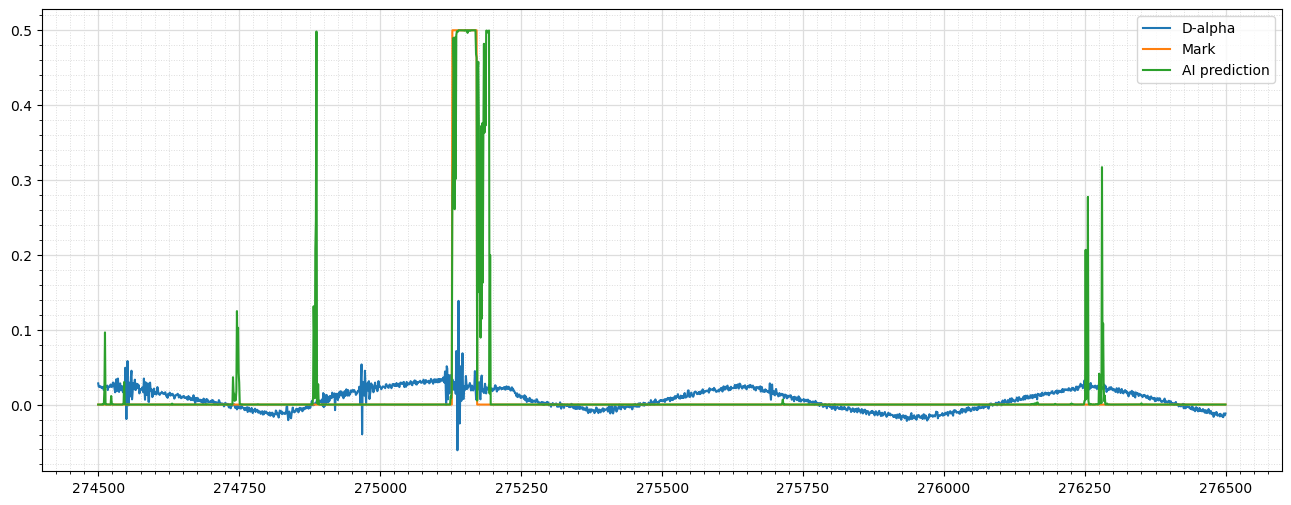

Input index pairs of ELM fragments:
 275000 275250
Input 1 or 0 to set:  0


<Figure size 640x480 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

mode_ploting = int(input("Input visualising mode [ 0 - manual | 1 - only marked ]:"))
mode_marking = int(input("Input marking mode (0 - manual | 1 - semiauto): ").strip().split()[0])

l_edge = int(input(f"Input start index [0:{df.shape[0]//1000*1000}]: ").strip().split()[0])
# print("---")
step = 1500
width = 2000

step_away = 10

while l_edge < df.shape[0]:
    r_edge = min(l_edge + width, df.shape[0])
    
    if mode_ploting == 1 and sum(df.ch1_marked[l_edge:r_edge]) == 0:
        l_edge += step
        continue
    
    fig, ax = plt.subplots()

    fig.set_figwidth(16)
    fig.set_figheight(6)

    ax.plot(range(l_edge, r_edge), normalise_series(df.ch1)[l_edge:r_edge], label="D-alpha")
    ax.plot(range(l_edge, r_edge), df.ch1_marked[l_edge:r_edge] * 0.5, label="Mark")
    ax.plot(range(l_edge, r_edge), df.ch1_ai_marked[l_edge:r_edge] * 0.5, label="AI prediction")

    ax.grid(which='major', color='#DDDDDD', linewidth=0.9)
    ax.grid(which='minor', color='#DDDDDD', linestyle=':', linewidth=0.7)
    ax.minorticks_on()
    ax.xaxis.set_minor_locator(AutoMinorLocator(10))
    ax.legend()
    plt.show()

    res = list(map(int, input("Input index pairs of ELM fragments:\n").strip().split()))
    for i in range(0, len(res), 2):
        board_ind = [res[i], res[i+1]]
        
        if (df.loc[board_ind[0]:board_ind[1], "ch1_marked"] == 1.).all():
            df.loc[board_ind[0]:board_ind[1], "ch1_marked"] = 0.
        elif (df.loc[board_ind[0]:board_ind[1], "ch1_marked"] == 1.).any():
            if input("Input 1 or 0 to set: ").lower() in ["1", "1.0", "y", "н", "1."]:
                if mode_marking:
                    board_ind = get_borders(df.loc[res[i]:res[i + 1], "ch1"].to_numpy(), scale=1.5)
                    board_ind[0] = max(board_ind[0] - step_away + res[i], 0)
                    board_ind[1] += res[i]
                    
                df.loc[board_ind[0]:board_ind[1], "ch1_marked"] = 1.
            else:
                df.loc[board_ind[0]:board_ind[1], "ch1_marked"] = 0.
        else:
            if mode_marking:
                board_ind = get_borders(df.loc[res[i]:res[i + 1], "ch1"].to_numpy(), scale=1.5)
                board_ind[0] = max(board_ind[0] - step_away + res[i], 0)
                board_ind[1] += res[i]
                
            df.loc[board_ind[0]:board_ind[1], "ch1_marked"] = 1.

    plt.close()
    plt.clf()
    l_edge += step

# 217500

In [13]:
df.to_csv(interval_path + f"df/{F_ID}_data.csv", index=False)
df.describe()

t            ch1     ch1_marked  ch1_ai_marked
count  393216.000000  393216.000000  393216.000000   3.932160e+05
mean        0.196607       0.261072       0.005201   1.881659e-02
std         0.113512       0.345136       0.071928   1.268655e-01
min         0.000000      -0.245391       0.000000   0.000000e+00
25%         0.098304       0.015337       0.000000   6.251169e-25
50%         0.196607       0.074128       0.000000   1.440859e-14
75%         0.294911       0.521455       0.000000   1.060892e-09
max         0.393215       4.902700       1.000000   1.000000e+00

In [18]:
count = 0
for i in range(df.shape[0]-1):
    if df.iloc[i].ch1_marked == 0 and df.iloc[i+1].ch1_marked == 1:
        count += 1
print(count)

# 44350 - [ 58 | 26 ]
# 44173 - [ 64 | 21 ]

26


---
## AI marking
---

In [4]:
from source.NN_environment import get_prediction_unet

df["ch1_ai_marked"] = get_prediction_unet(df["ch1"].to_numpy(), ckpt_v=2)  # , old=True
df.to_csv(interval_path + f"df/{F_ID}_data.csv", index=False)
df.describe()

D:\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 52 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


t           ch1  ch1_marked  ch1_ai_marked
count  76243.000000  76243.000000     76243.0   7.624300e+04
mean     203.119000      0.529203         0.0   1.001058e-01
std       22.009603      0.160735         0.0   2.752408e-01
min      164.998000      0.181490         0.0   2.584950e-17
25%      184.058500      0.396200         0.0   9.571570e-08
50%      203.119000      0.526570         0.0   6.554467e-06
75%      222.179500      0.639040         0.0   1.165128e-03
max      241.240000      1.265300         0.0   1.000000e+00

---
## Export to SHT
---

In [7]:
import shtReader_py.shtRipper as shtRipper

to_pack = {
    "D-alpha, chord=50 cm": {
        'comment': f'SHOT: #{F_ID}',
        'unit': 'U(V)',
        'tMin': df.t.min(),  # minimum time
        'tMax': df.t.max(),  # maximum time
        'offset': 0.0,  # ADC zero level offset
        'yRes': -0.00255615,  # ADC resolution: 0.0001 Volt per adc bit
        'y': df.ch1.to_list()
    },
    "Mark": {
        'comment': 'ELMs marks (by proc-sys v2.0-0scl; 31.07.2024)',
        'unit': 'U(V)',
        'tMin': df.t.min(),  # minimum time
        'tMax': df.t.max(),  # maximum time
        'offset': 0.0,  # ADC zero level offset
        'yRes': 0.0001,  # ADC resolution: 0.0001 Volt per adc bit
        'y': df.ch1_marked.to_list()
    },
    "AI prediction": {
        'comment': 'Processed NN prediction of ELMs (v2 new; trn-on: #44184, #44194)',
        'unit': 'U(V)',
        'tMin': df.t.min(),  # minimum time
        'tMax': df.t.max(),  # maximum time
        'offset': 0.0,  # ADC zero level offset
        'yRes': 0.0001,  # ADC resolution: 0.0001 Volt per adc bit
        'y': df.ch1_ai_marked.to_list()
    },
}

packed = shtRipper.ripper.write(path="D:/Edu/Lab/D-alpha-instability-search/data/sht/marked/", filename=f'{F_ID}_data.SHT', data=to_pack)

In [3]:
# def process_fragments(data: np.array, mark_data: np.array, edge=10, scale=np.exp(1), step_out=10) -> np.array:
#     proc_slice = Slice(0, 0)
#     cur_slice = Slice(0, 1)
#     f_fragment = False
#
#     while cur_slice.r < mark_data.shape[0]:
#         if mark_data[cur_slice.r] == 1.0:
#             if not f_fragment:
#                 f_fragment = True
#         elif f_fragment:
#             if not cur_slice.check_length(edge):
#                 mark_data[cur_slice.l: cur_slice.r] = 0.0
#                 if not proc_slice.is_null():
#                     mark_data[proc_slice.l: proc_slice.r] = 1.0
#                     proc_slice.collapse_borders()
#             elif not proc_slice.collide_slices(cur_slice, edge):
#                 mark_data[proc_slice.l: proc_slice.r] = 1.0
#                 proc_slice.copy(cur_slice)
#
#             f_fragment = False
#             cur_slice.collapse_borders()
#         elif not f_fragment:
#             cur_slice.collapse_borders()
#             if not proc_slice.is_null():
#                 proc_slice.copy(cur_slice)
#
#         cur_slice.step()
#
#     return mark_data

# elif scale:
# mark_data[cur_slice.l: cur_slice.r] = 0.0
# if cur_slice.check_length(edge):
#     borders = get_borders(data[cur_slice.l: cur_slice.r], scale)
#     # print(boards)
#     borders[0] = max(borders[0] + cur_slice.l - step_out, 0)
#     borders[1] = min(borders[1] + cur_slice.l, mark_data.shape[0])

#     mark_data[borders[0]:borders[1]] = 1.0

In [4]:
# from source.NN_environment import process_fragments

df["ch1_marked"] = down_to_zero(np.array(df["ch1_ai_marked"]), edge=0.5)
df["ch1_marked"] = process_fragments(np.array(df["ch1"]), np.array(df["ch1_marked"]), scale=0)
df.describe()

t           ch1    ch1_marked  ch1_ai_marked
count  76243.000000  76243.000000  76243.000000   7.624300e+04
mean     203.119000      0.529203      0.083365   1.001058e-01
std       22.009603      0.160735      0.276435   2.752408e-01
min      164.998000      0.181490      0.000000   2.584950e-17
25%      184.058500      0.396200      0.000000   9.571570e-08
50%      203.119000      0.526570      0.000000   6.554467e-06
75%      222.179500      0.639040      0.000000   1.165128e-03
max      241.240000      1.265300      1.000000   1.000000e+00

In [5]:
df.to_csv(interval_path + f"df/{F_ID}_data.csv", index=False)


In [40]:
df["ch1_marked"] = df["ch1_ai_marked"]
df["ch1_ai_marked"] = 0